<h1> evaluate and compare all networks... 

In [1]:
# own skrips
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

In [2]:
rootfile = uproot.open('./stage4_clusters.root')
ipd = hf.InputData_2photon(rootfile)
ipd.form_cluster(clustershape=(9,9))
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  154.7756905555725 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [3]:
model_1 = keras.models.load_model('stage4_network1')
model_fw = keras.models.load_model('stage4model_first_working')
model_big = keras.models.load_model('stage4_network2_big')
model_x = keras.models.load_model('stage4_network_sort_x')
model_y = keras.models.load_model('stage4_network_sort_y')

In [5]:
output_1 = model_1.predict(ipd.clusters_v)
output_big = model_big.predict(ipd.clusters_v)

In [6]:
ev_1 = hf.Evaluation_2photon(ipd, output_1)
ev_big = hf.Evaluation_2photon(ipd, output_big)

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 81)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8

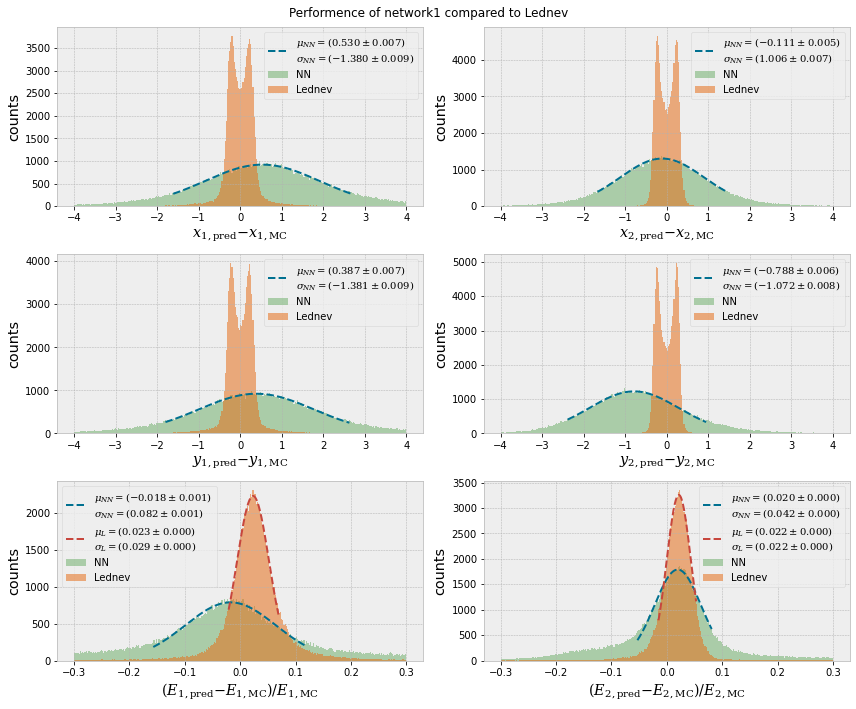

In [8]:
ev1_fit_v_Lednev = ev_1.show_hist_NN_withLednev()

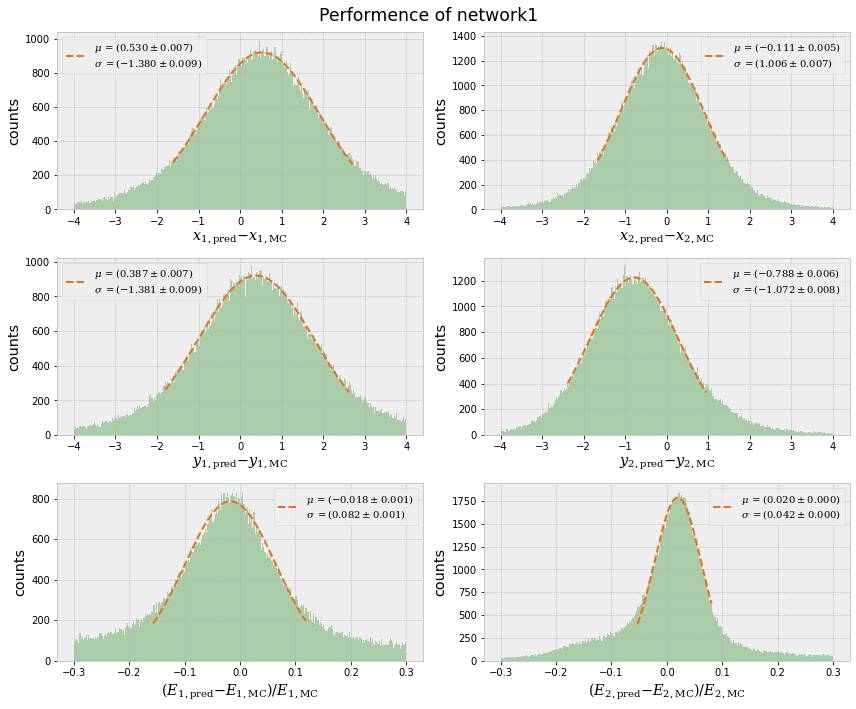

In [28]:
ev1_fit_v = ev_1.show_hist_NN()

In [25]:
model_big.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 81)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1

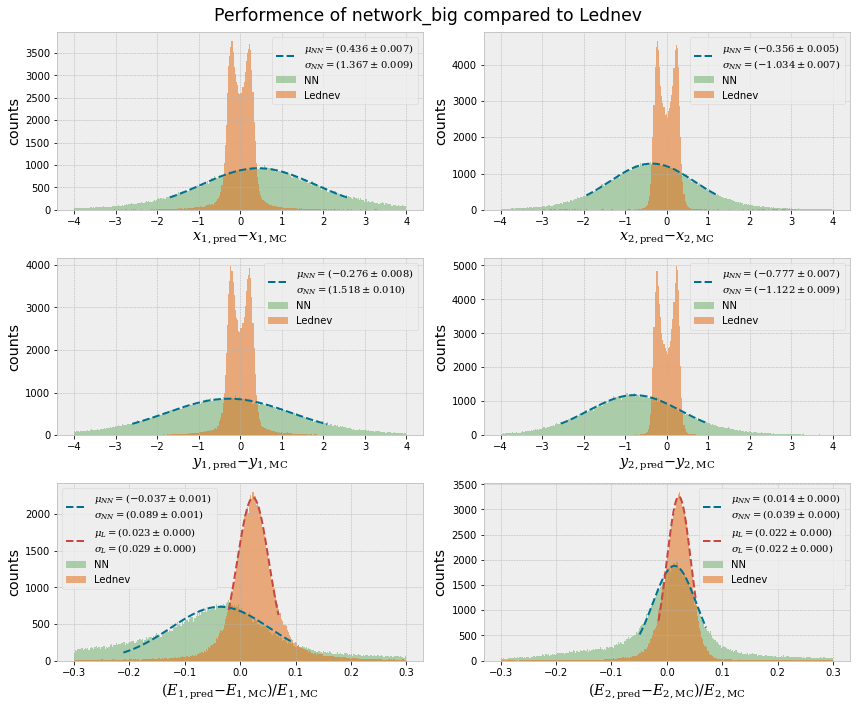

In [17]:
evbig_fit_v_Lednev = ev_big.show_hist_NN_withLednev(figsave=(False, "network_big"))

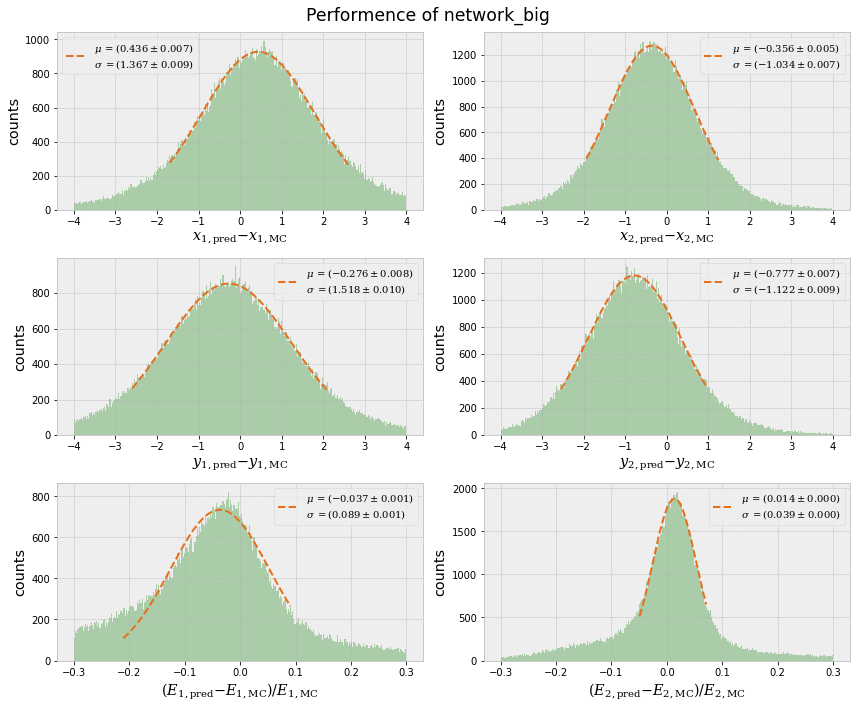

In [29]:
evbig_fit_v = ev_big.show_hist_NN(figsave=(False, "network_big"))

In [10]:
rootfile_x = uproot.open('./stage4_clusters.root')
ipd_x = hf.InputData_2photon(rootfile_x, sort_cond="x")
ipd_x.form_cluster(clustershape=(9,9))
ipd_x.train_test_split()
ipd_x.prep_trainingsdata()
ipd_x.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  161.19656610488892 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [11]:
output_x = model_x.predict(ipd_x.clusters_v)

In [12]:
ev_x = hf.Evaluation_2photon(ipd_x, output_x)

In [26]:
model_x.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 81)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8

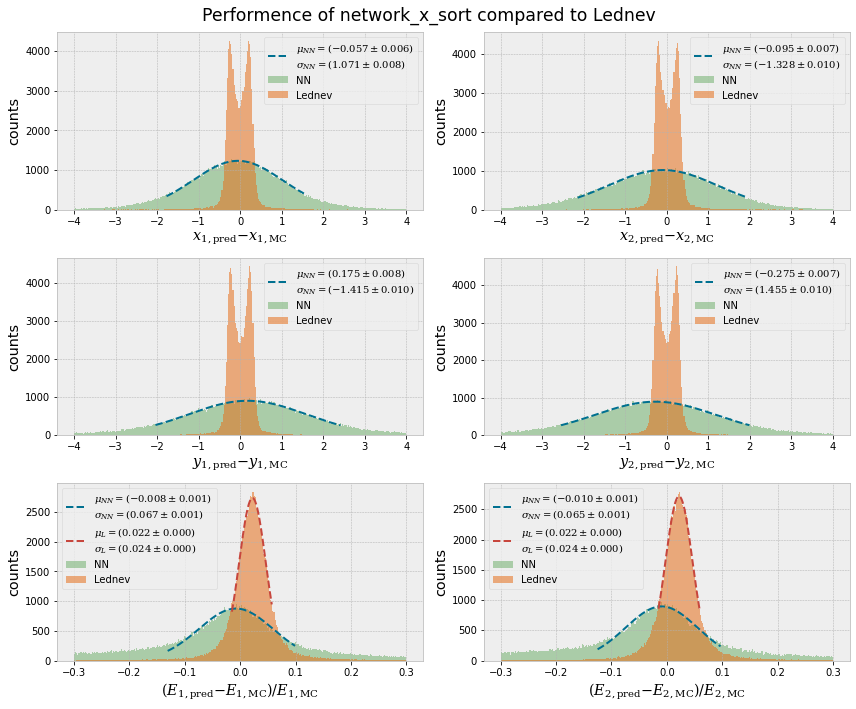

In [15]:
evx_fit_v_Lednev = ev_x.show_hist_NN_withLednev(figsave=(False, "network_x_sort"))

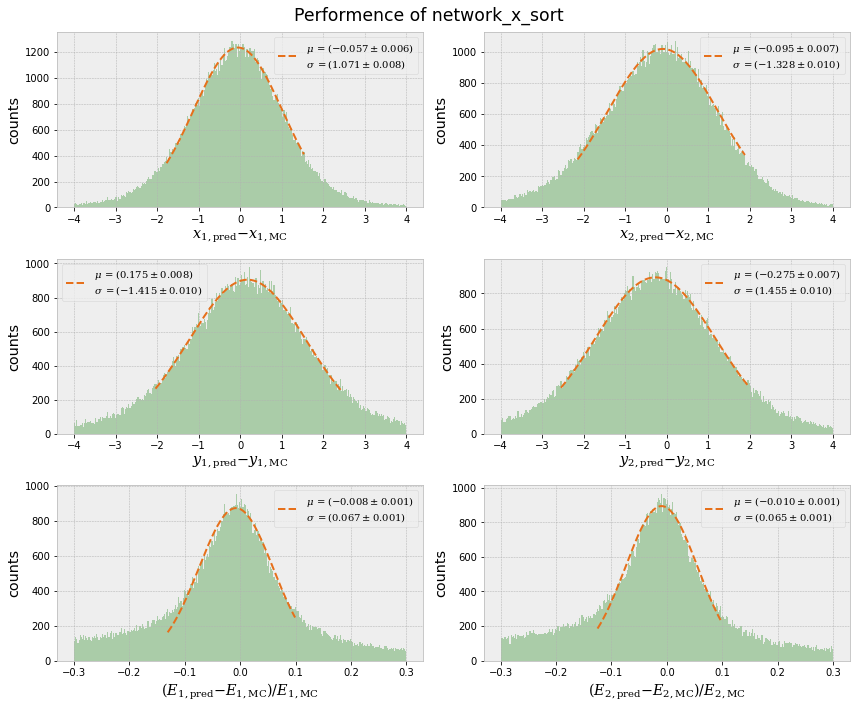

In [30]:
evx_fit_v= ev_x.show_hist_NN(figsave=(False, "network_x_sort"))

In [ ]:
rootfile_y = uproot.open('./stage4_clusters.root')
ipd_y = hf.InputData_2photon(rootfile_y, sort_cond="y")
ipd_y.form_cluster(clustershape=(9,9))
ipd_y.train_test_split()
ipd_y.prep_trainingsdata()
ipd_y.prep_verificationdata()
output_y = model_y.predict(ipd_y.clusters_v)
ev_y = hf.Evaluation_2photon(ipd_y, output_y)

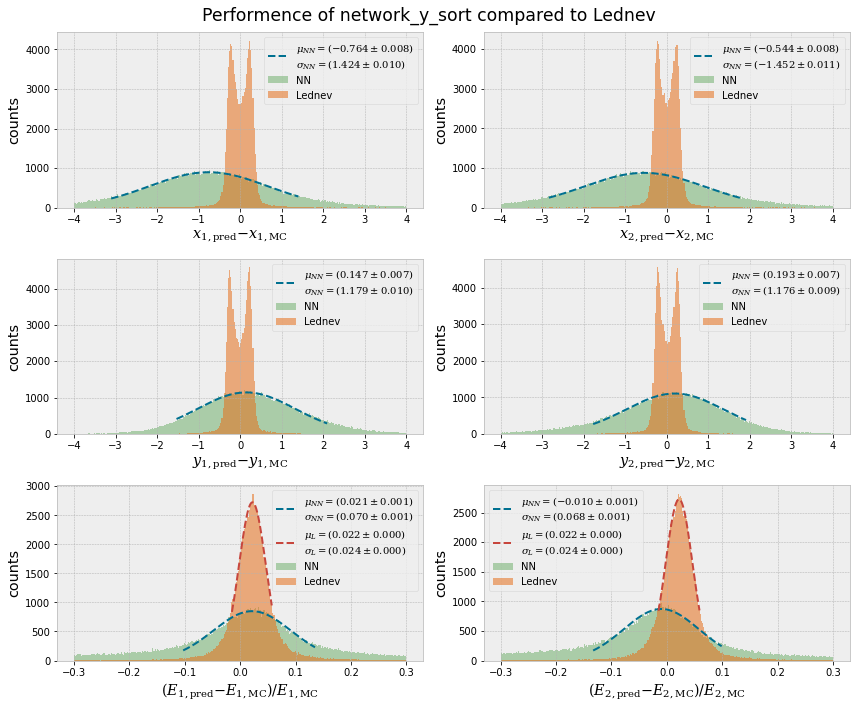

In [20]:
evy_fit_v_Lednev = ev_y.show_hist_NN_withLednev(figsave=(False, "network_y_sort"))

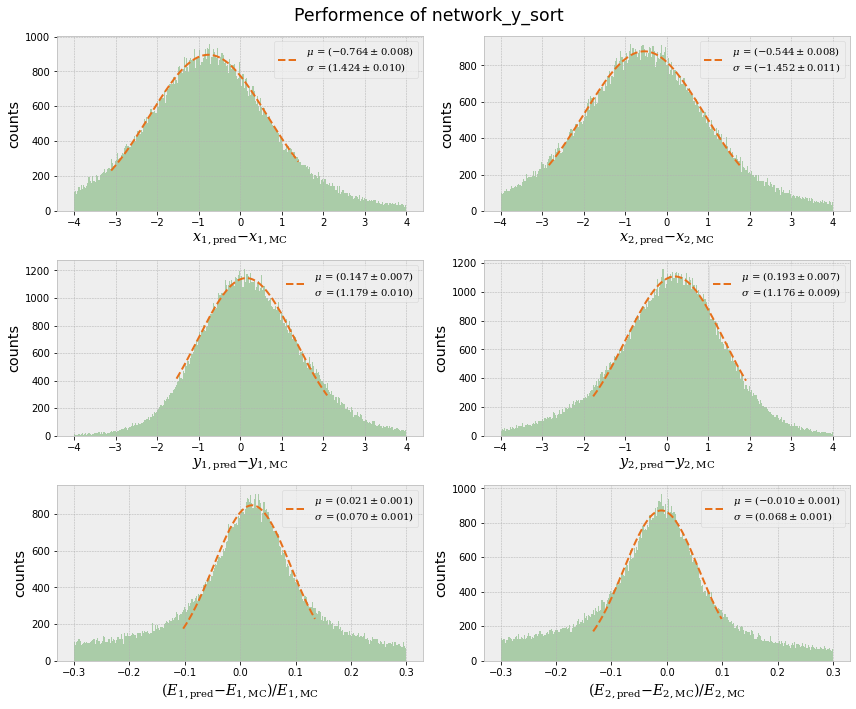

In [31]:
evy_fit_v= ev_y.show_hist_NN(figsave=(False, "network_y_sort"))

In [18]:
rootfile_fw = uproot.open('./stage4_clusters.root')
ipd_fw = hf.InputData_2photon(rootfile_fw)
ipd_fw.form_cluster(clustershape=(8,8))
ipd_fw.train_test_split()
ipd_fw.prep_trainingsdata()
ipd_fw.prep_verificationdata()
output_fw = model_fw.predict(ipd_fw.clusters_v)
ev_fw = hf.Evaluation_2photon(ipd_fw, output_fw)

Initialized object
Start shaping clusters in a  (8, 8)  grid...
Shaping the clusters took  156.04082465171814 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [27]:
model_fw.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

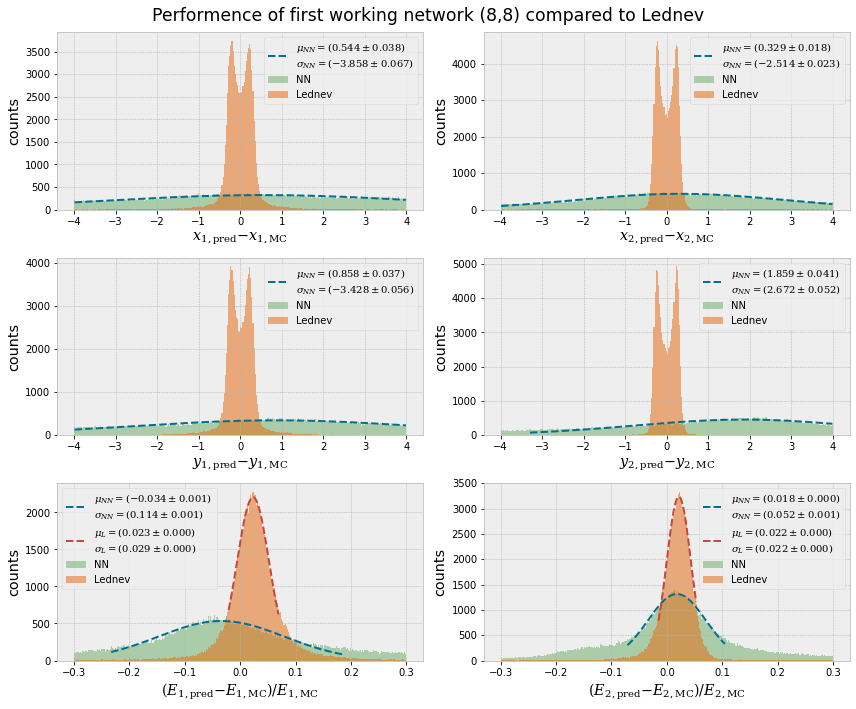

In [21]:
ev_fw_fit_v_Lednev = ev_fw.show_hist_NN_withLednev(figsave=(False, "first working network (8,8)"))

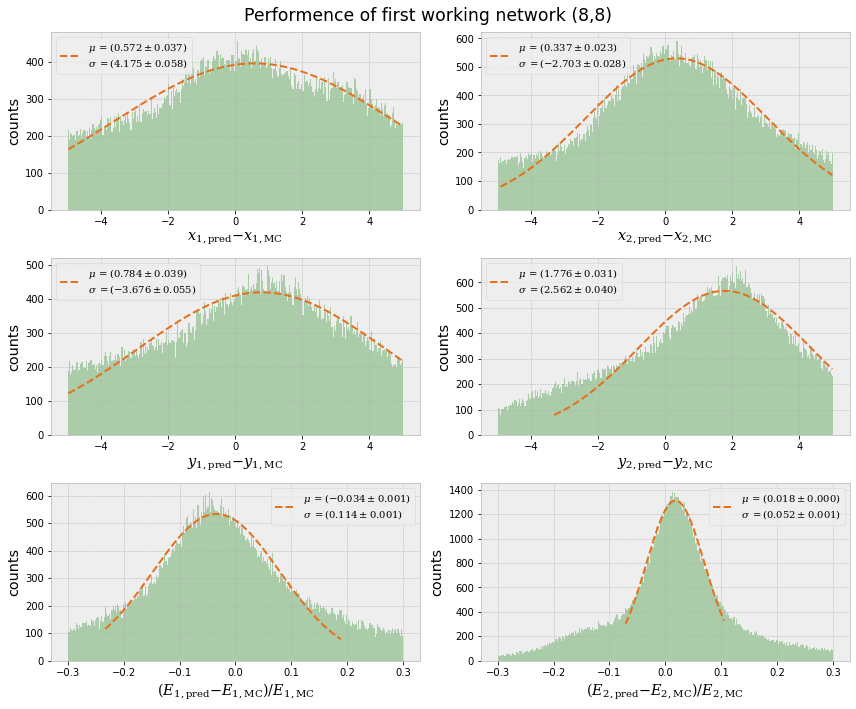

In [23]:
ev_fw_fit_v = ev_fw.show_hist_NN(figsave=(False, "first working network (8,8)"), r_x=(-5,5), r_y=(-5,5))